<a href="https://colab.research.google.com/github/lavanyasaxena/lavanyasaxena/blob/master/employeeattrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install pandas

In [55]:
!apt install sklearn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package sklearn


In [35]:
!pip install seaborn

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import zipfile
zip_ref=zipfile.ZipFile('/content/archive (2).zip')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
df=pd.read_csv('MFG10YearTerminationData.csv')

In [4]:
df.head(7)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE


In [5]:
df.shape

(49653, 18)

In [6]:
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [7]:
df.isna().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [9]:
df.isnull().values.any()

False

In [10]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [13]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [17]:
'Attrition' in df.columns

False

In [31]:
#df['Attrition'].value_counts()
#sns.countplot(df['Attrition'])

In [32]:
(1233-237)/1233

0.8077858880778589

In [38]:
print(df.columns)

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')


In [39]:
if "Age" in df.columns:
    print("'Age' column exists in the DataFrame")
else:
    print("'Age' column does not exist in the DataFrame")

'Age' column does not exist in the DataFrame


In [40]:
assert "Age" not in df.columns

<Axes: xlabel='age', ylabel='count'>

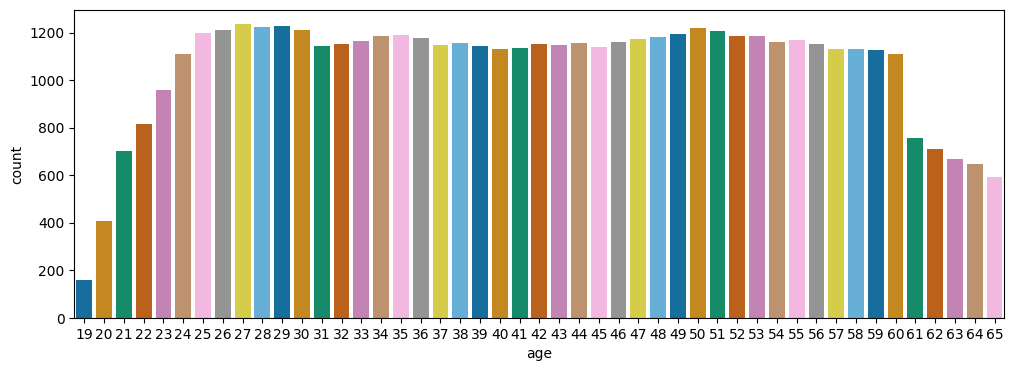

In [42]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x='age',data=df,palette='colorblind')

In [43]:
for column in df.columns:
  if df[column].dtype == object:
    print(str(column)+':' + str(df[column].unique()))
    print(df[column].value_counts())
    print('__________________________________________________________')

recorddate_key:['12/31/2006 0:00' '12/31/2007 0:00' '12/31/2008 0:00' '12/31/2009 0:00'
 '12/31/2010 0:00' '12/31/2011 0:00' '12/31/2012 0:00' '12/31/2013 0:00'
 '12/31/2014 0:00' '12/31/2015 0:00' '2/1/2009 0:00' '2/1/2014 0:00'
 '3/1/2014 0:00' '3/1/2009 0:00' '9/1/2012 0:00' '4/1/2014 0:00'
 '4/1/2009 0:00' '5/1/2009 0:00' '5/1/2014 0:00' '12/1/2014 0:00'
 '6/1/2009 0:00' '6/1/2014 0:00' '7/1/2014 0:00' '7/1/2009 0:00'
 '8/1/2009 0:00' '8/1/2014 0:00' '12/1/2009 0:00' '9/1/2014 0:00'
 '9/1/2009 0:00' '10/1/2009 0:00' '10/1/2014 0:00' '11/1/2014 0:00'
 '11/1/2009 0:00' '7/1/2007 0:00' '1/1/2015 0:00' '1/1/2010 0:00'
 '12/1/2010 0:00' '2/1/2015 0:00' '2/1/2010 0:00' '3/1/2015 0:00'
 '3/1/2010 0:00' '4/1/2010 0:00' '4/1/2015 0:00' '5/1/2015 0:00'
 '5/1/2010 0:00' '6/1/2010 0:00' '6/1/2015 0:00' '7/1/2010 0:00'
 '7/1/2015 0:00' '12/1/2015 0:00' '3/1/2011 0:00' '8/1/2015 0:00'
 '9/1/2010 0:00' '9/1/2015 0:00' '10/1/2015 0:00' '10/1/2010 0:00'
 '10/1/2011 0:00' '11/1/2015 0:00' '11/1/2010

In [45]:
df['STATUS'].unique()

array(['ACTIVE', 'TERMINATED'], dtype=object)

In [48]:
df=df.drop('EmployeeID',axis=1)
df=df.drop('STATUS',axis=1)

In [49]:
df.corr()

,age,length_of_service,store_name,STATUS_YEAR
age,1.000000,0.909430,-0.004068,-0.039738
length_of_service,0.909430,1.000000,0.011724,0.237022
store_name,-0.004068,0.011724,1.000000,0.008656
STATUS_YEAR,-0.039738,0.237022,0.008656,1.000000


<Axes: >

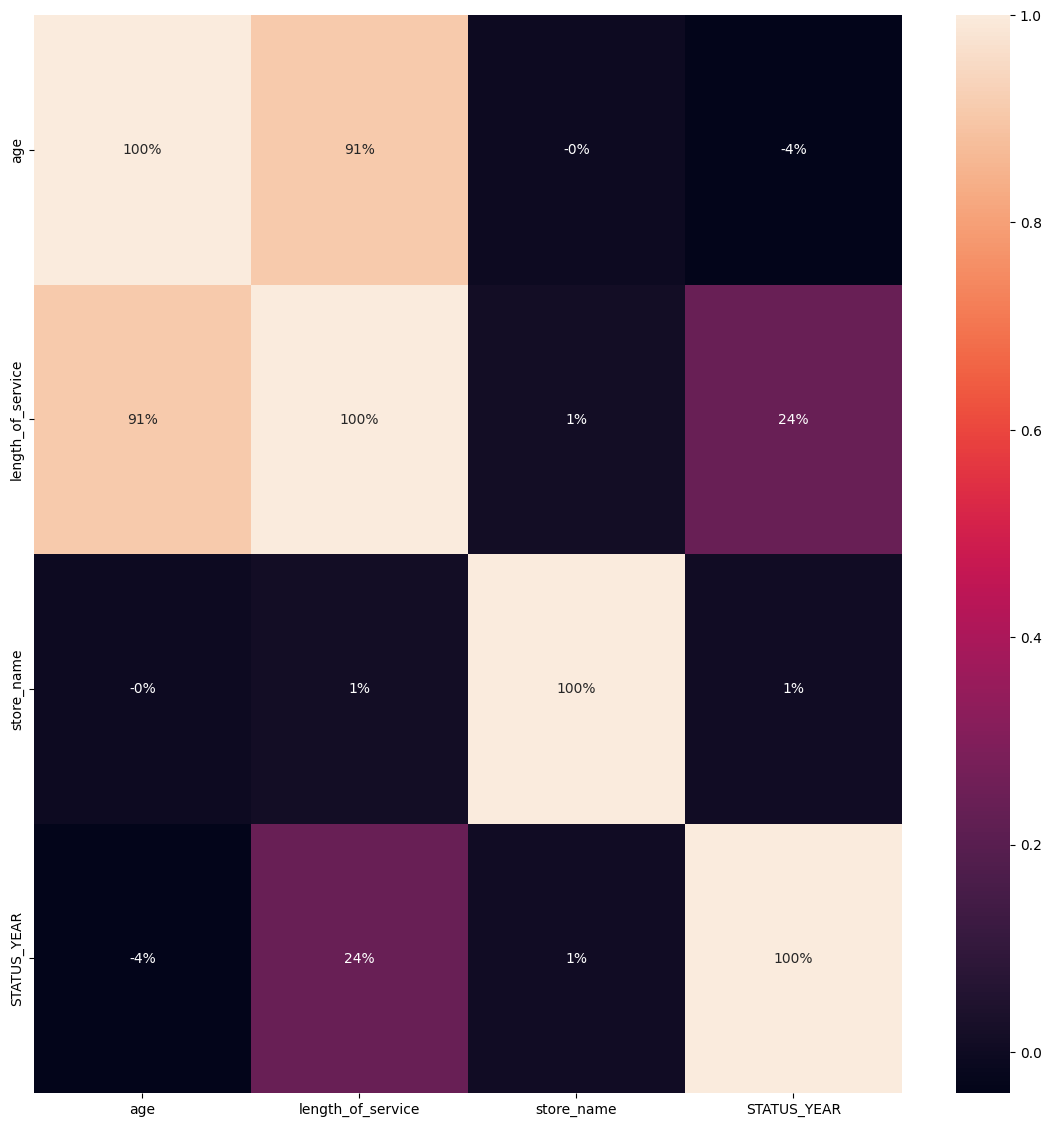

In [51]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [59]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  df[column]=LabelEncoder().fit_transform(df[column])

In [60]:
df['Age_years']=df['age']

In [61]:
df=df.drop('age',axis=1)

In [62]:
df

,recorddate_key,orighiredate_key,terminationdate_key,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,BUSINESS_UNIT,Age_years
0,40,3929,0,17,34,9,7,34,1,1,1,1,0,0,33
1,41,3929,0,18,34,9,7,34,1,1,1,1,1,0,34
2,42,3929,0,19,34,9,7,34,1,1,1,1,2,0,35
3,43,3929,0,20,34,9,7,34,1,1,1,1,3,0,36
4,44,3929,0,21,34,9,7,34,1,1,1,1,4,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,39,3831,345,2,33,7,14,33,1,1,0,0,9,1,2
49649,117,3928,948,0,34,6,9,43,0,0,2,2,7,1,0
49650,39,4150,345,2,38,6,9,38,0,0,0,0,9,1,2
49651,37,769,349,0,15,6,9,15,0,0,2,2,7,1,0


In [64]:
X=df.iloc[:, 1:df.shape[1]].values
Y=df.iloc[:, 0].values

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [66]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest.fit(X_train,Y_train,)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [67]:
forest.score(X_train,Y_train)

0.9999194392975107

In [69]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,forest.predict(X_test))
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print(cm)
print('Modeling Test Accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))

[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 0]]
Modeling Test Accuracy=1.0
